In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.4.1'

In [3]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('../saved_models/vehicle_model.h5')

In [4]:
size = (256, 256)
class_names = ['Articulated Truck', 'Background', 'Bicycle', 'Bus', 'Car', 'Motorcycle', 'Non Motorized Vehicle', 'Pedestrian', 'Pickup Truck', 'Single Unit Truck', 'Work Van']

def predict_image(x):
  """predict a given image"""
  
  img = tf.keras.preprocessing.image.smart_resize(x, size)
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  return (class_names[np.argmax(score)], round(100 * np.max(score), 2))

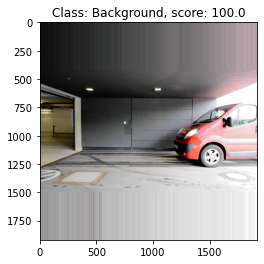

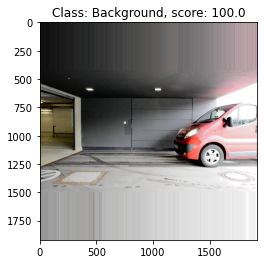

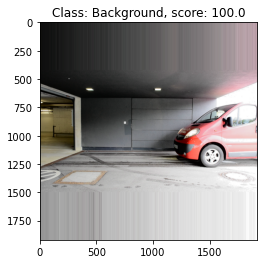

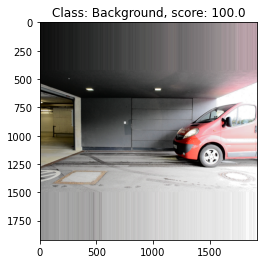

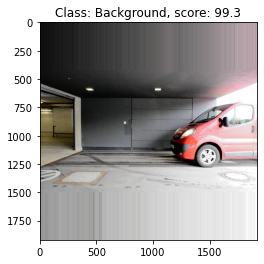

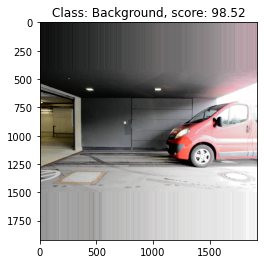

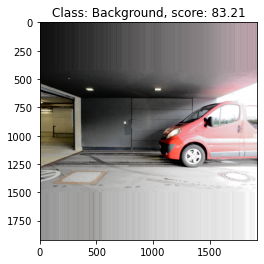

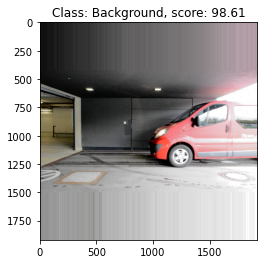

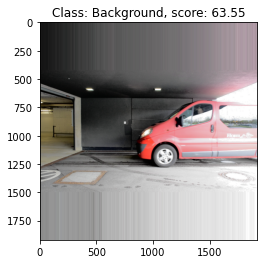

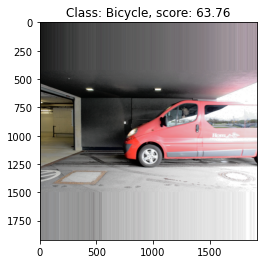

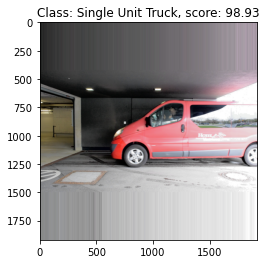

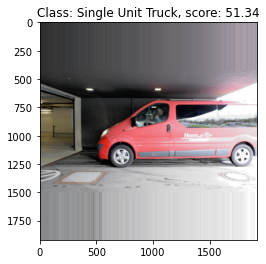

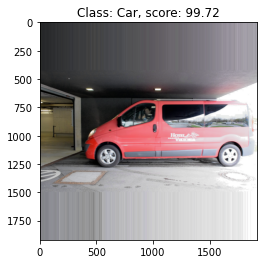

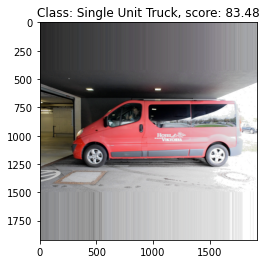

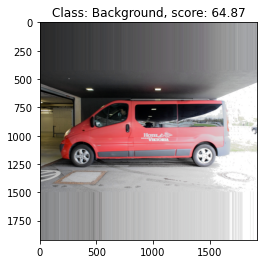

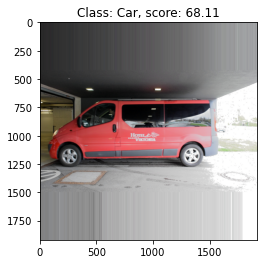

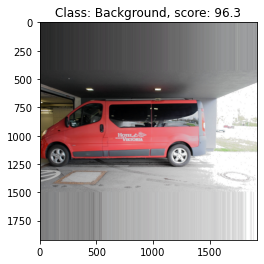

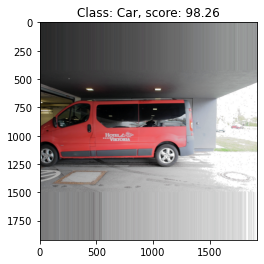

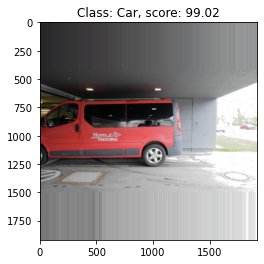

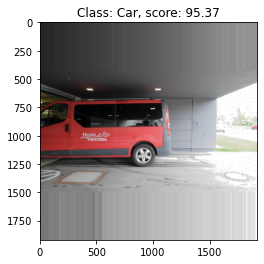

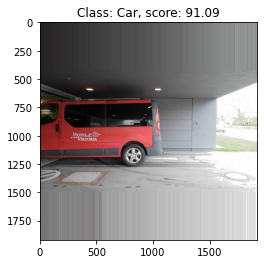

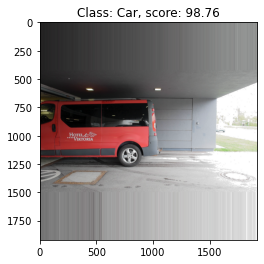

In [7]:
cap = cv2.VideoCapture('../datasets/opel_side.MOV') # capture
count = 0

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        count += 10 # i.e. at 30 fps, this advances one second
        
        img_yuv = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)

        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

        # convert the YUV image back to RGB format
        frame = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

        # frame shape = 1920x1080x3
        # add padding -> 1920x1920x3
        img = cv2.copyMakeBorder(frame, 420, 420, 0, 0, cv2.BORDER_REPLICATE)

        cls, score = predict_image(img) # predict frame

        # display image
        plt.imshow(img)
        plt.title(f'Class: {cls}, score: {score}')
        plt.show()
        
        cap.set(1, count) # advance by 30 fps
    else:
        cap.release()
        break